In [ ]:
!pip install -q datasets transformers librosa jiwer accelerate
!pip install -U datasets transformers accelerate evaluate


from google.colab import drive
from huggingface_hub import notebook_login

drive.mount("/content/drive")
notebook_login()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from datasets import load_dataset, Dataset
from itertools import islice

# 학습용 (train split)
ko_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="train", streaming=True), 192))
en_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="train", streaming=True), 200))
ja_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="train", streaming=True), 200))
de_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="train", streaming=True), 200))

train_dataset = Dataset.from_list(ko_train + en_train + ja_train + de_train)

# 검증용 (validation split - streaming 적용, 개수 제한)
ko_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="validation", streaming=True), 100))
en_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="validation", streaming=True), 100))
ja_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="validation", streaming=True), 100))
de_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="validation", streaming=True), 100))

val_dataset = Dataset.from_list(ko_val + en_val + ja_val + de_val)

# 테스트용 (test split - streaming 적용, 개수 제한)
from itertools import islice

ko_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="test", streaming=True), 100))
en_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="test", streaming=True), 100))
ja_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="test", streaming=True), 100))
de_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="test", streaming=True), 100))

test_dataset = Dataset.from_list(ko_test + en_test + ja_test + de_test)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

common_voice_13_0.py:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_13_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_13_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Reading metadata...: 192it [00:00, 695.57it/s]
Reading metadata...: 1013968it [00:23, 42790.21it/s]
Reading metadata...: 7071it [00:00, 9015.32it/s]
Reading metadata...: 540437it [00:13, 40151.18it/s]
Reading metadata...: 105it [00:00, 396.53it/s]
Reading metadata...: 16372it [00:00, 41743.37it/s]
Reading metadata...: 4961it [00:00, 17226.94it/s]
Reading metadata...: 16143it [00:00, 39807.64it/s]
Reading metadata...: 131it [00:00, 447.79it/s]
Reading metadata...: 16372it [00:00, 28799.46it/s]
Reading metadata...: 4961it [00:00, 16364.84it/s]
Reading metadata...: 16143it [00:00, 40520.74it/s]


In [ ]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

checkpoint = "openai/whisper-medium"
processor = WhisperProcessor.from_pretrained(checkpoint)
model = WhisperForConditionalGeneration.from_pretrained(checkpoint)
model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.06G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

In [ ]:
def prepare_dataset(example):
    audio = example["audio"]
    example["input_features"] = processor.feature_extractor(audio["array"], sampling_rate=16000).input_features[0]
    example["labels"] = processor.tokenizer(example["sentence"]).input_ids
    return example

processed_dataset_train = train_dataset.map(prepare_dataset, remove_columns=train_dataset.column_names)
processed_dataset_val = val_dataset.map(prepare_dataset, remove_columns=val_dataset.column_names)
processed_dataset_test = test_dataset.map(prepare_dataset, remove_columns=test_dataset.column_names)

Map:   0%|          | 0/792 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [ ]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import torch

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    padding: Union[bool, str] = True

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": f["input_features"]} for f in features]
        label_features = [{"input_ids": f["labels"]} for f in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        batch["labels"] = labels
        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)


In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/WhisperCheckpoints/run_medium_lr2(1)",
    per_device_train_batch_size=4, # Reduced batch size
    gradient_accumulation_steps=2, # Added gradient accumulation steps (effective batch size becomes 4 * 2 = 8)
    learning_rate=3e-5,
    num_train_epochs=5,
    logging_steps=10,
    save_strategy="epoch",
    fp16=True,
    report_to="none",
    gradient_checkpointing=True, # 그라디언트 체크포인팅 활성화
    gradient_checkpointing_kwargs={"use_reentrant": False}, # 일부 환경에서 필요할 수 있는 추가 설정
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset_train,
    tokenizer=processor,
    data_collator=data_collator
)

<ipython-input-10-f86a35ea9f80>:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

`use_cache = True` is incompatible with gradient checkpointing. Setting `use_cache = False`...


Step,Training Loss
10,7.539500
20,3.722700
30,2.118300
40,1.595900
50,1.296800
60,1.021400
70,0.912900
80,0.843800
90,0.783900
100,0.857600


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=495, training_loss=0.48695935971959675, metrics={'train_runtime': 1526.868, 'train_samples_per_second': 2.594, 'train_steps_per_second': 0.324, 'total_flos': 4.0415954337792e+18, 'train_loss': 0.48695935971959675, 'epoch': 5.0})

In [ ]:
save_path = "/content/drive/MyDrive/WhisperCheckpoints/run_medium_lr2(1)"
model.save_pretrained(save_path)
processor.save_pretrained(save_path)

[]

In [ ]:
import torch
from jiwer import wer
from tqdm import tqdm

lang_list = ["ko", "en", "ja", "de"]
lang_wer_results = {}

for lang in lang_list:
    print(f"🌍 Language: {lang}")
    lang_data = [x for x in val_dataset if x["locale"] == lang]

    predictions, references = [], []

    for sample in tqdm(lang_data):
        input_features = processor.feature_extractor(
            sample["audio"]["array"], sampling_rate=16000, return_tensors="pt"
        ).input_features.to(model.device)

        decoder_ids = processor.get_decoder_prompt_ids(language=sample["locale"], task="transcribe")
        model.config.forced_decoder_ids = decoder_ids

        with torch.no_grad():
            predicted_ids = model.generate(input_features)

        transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
        predictions.append(transcription)
        references.append(sample["sentence"])

        print(f"🔹 Predicted: {transcription}")
        print(f"🔸 Reference: {sample['sentence']}")

    score = wer(references, predictions)
    lang_wer_results[lang] = score
    print(f"✅ {lang.upper()} WER: {score:.4f}")

🌍 Language: ko


  0%|          | 0/100 [00:00<?, ?it/s]Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
  1%|          | 1/100 [00:01<01:59,  1.21s/it]

🔹 Predicted: 그
🔸 Reference: 그와 동시에 애상적이던 기분은 구름과 같이 흩어지고 안개처럼 스러졌다.


  2%|▏         | 2/100 [00:01<01:09,  1.41it/s]

🔹 Predicted: 하�
🔸 Reference: 하면서도 기천은 동혁이가 먹는다는 바람에 숨도 아니 쉬고 쪼옥 들이켰다.


  3%|▎         | 3/100 [00:01<00:52,  1.83it/s]

🔹 Predicted: 이�
🔸 Reference: 의사에게 죽음의 선고를 받은 줄도 모르는 영신은 주사 기운에 조금 의식을 회복하였다.


  4%|▍         | 4/100 [00:02<00:45,  2.13it/s]

🔹 Predicted: �
🔸 Reference: 무릇 경영은 의논함으로 성취하나니 모략을 베풀고 전쟁할지니라


  5%|▌         | 5/100 [00:02<00:40,  2.35it/s]

🔹 Predicted: 아니
🔸 Reference: 아니다 결코 아니다.


  6%|▌         | 6/100 [00:02<00:37,  2.51it/s]

🔹 Predicted: 고
🔸 Reference: 공연한 소리 하지 말고 어서 가세.


  7%|▋         | 7/100 [00:03<00:35,  2.60it/s]

🔹 Predicted: �
🔸 Reference: 선비는 받아 가지고 간난의 뒤를 따랐다.


  8%|▊         | 8/100 [00:03<00:34,  2.67it/s]

🔹 Predicted: �
🔸 Reference: 새벽배송보다도 로켓배송보다도 빠른 양자 배송 서비스를 오늘부터 시작합니다.


  9%|▉         | 9/100 [00:04<00:33,  2.72it/s]

🔹 Predicted: 청
🔸 Reference: 청하는 이쪽 노를 저으면서 소리를 지른다.


 10%|█         | 10/100 [00:04<00:32,  2.75it/s]

🔹 Predicted: 여�
🔸 Reference: 여러 사람의 앞으로 한 걸음 다가서며 그 검붉은 얼굴이 매우 긴장해진다.


 11%|█         | 11/100 [00:04<00:31,  2.79it/s]

🔹 Predicted: 여
🔸 Reference: 여전히 사건 파악을 못 하고 있는데도?


 12%|█▏        | 12/100 [00:05<00:31,  2.80it/s]

🔹 Predicted:  즐
🔸 Reference: 즐겁고 재미있는 콘텐츠를 만들 작가를 모집합니다.


 13%|█▎        | 13/100 [00:05<00:30,  2.82it/s]

🔹 Predicted: 이
🔸 Reference: 이거리를 둘이서 걸어요.


 14%|█▍        | 14/100 [00:05<00:30,  2.82it/s]

🔹 Predicted: �
🔸 Reference: 간난이는 생긋 웃어 보이며 머리를 흔들었다.


 15%|█▌        | 15/100 [00:06<00:30,  2.82it/s]

🔹 Predicted: �
🔸 Reference: 무어가 무언지 분간할 수 없는 나는 이렇게 물었다.


 16%|█▌        | 16/100 [00:06<00:29,  2.82it/s]

🔹 Predicted: 국
🔸 Reference: 국무총리는 국회의 동의를 얻어 대통령이 임명한다.


 17%|█▋        | 17/100 [00:06<00:29,  2.83it/s]

🔹 Predicted: 부�
🔸 Reference: 부르짖으며 발길로 벽을 걷어차고 일어났다.


 18%|█▊        | 18/100 [00:07<00:28,  2.83it/s]

🔹 Predicted: 나
🔸 Reference: 나오는 줄 모르고 이런 말을 하고도 가슴이 선뜩하였다.


 19%|█▉        | 19/100 [00:07<00:28,  2.83it/s]

🔹 Predicted: 저
🔸 Reference: 저 뒤에 동영상으로 주암동 사건 개요가 나올 겁니다.


 20%|██        | 20/100 [00:07<00:28,  2.82it/s]

🔹 Predicted: 기
🔸 Reference: 게으른 자는 말하기를 사자가 밖에 있은즉 내가 나가면 거리에서 찢기겠다 하느니라


 21%|██        | 21/100 [00:08<00:27,  2.83it/s]

🔹 Predicted: 그�
🔸 Reference: 그럼, 내일 오랍쇼니까?


 22%|██▏       | 22/100 [00:12<02:01,  1.55s/it]

🔹 Predicted: 그他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他
🔸 Reference: 그는 나를 밀쳐 버린 다음에 그 음보를 들고서 읽기 시작하였습니다.


 23%|██▎       | 23/100 [00:12<01:32,  1.20s/it]

🔹 Predicted: 그�
🔸 Reference: 그리고 이 집에서 옥점이를 어떻게 귀여워하는 것을 잠시간이라도 알 수가 있다.


 24%|██▍       | 24/100 [00:13<01:11,  1.06it/s]

🔹 Predicted: 아
🔸 Reference: 아까까지 영신은 그 불을 얕은 하늘의 별들이 반짝이는 줄로만 알고있었다.


 25%|██▌       | 25/100 [00:13<00:57,  1.30it/s]

🔹 Predicted: 의
🔸 Reference: 의심하는 마음과 한꺼번에 일어나는 것은 질투였다.


 26%|██▌       | 26/100 [00:14<00:47,  1.55it/s]

🔹 Predicted: �
🔸 Reference: 골김에 그저 이놈의 장인님, 하고 댓돌에다 메꼰코 우리 고향으로 내뺄까 하다가 꾹꾹 참고 말았다.


 27%|██▋       | 27/100 [00:14<00:40,  1.79it/s]

🔹 Predicted: �
🔸 Reference: 여보게 김첨지


 28%|██▊       | 28/100 [00:14<00:35,  2.01it/s]

🔹 Predicted: 갑
🔸 Reference: 갑자기 튀어져 나오는 광포, 거기 연한 쾌미, 흥소


 29%|██▉       | 29/100 [00:15<00:32,  2.20it/s]

🔹 Predicted: �
🔸 Reference: 뜨거운 볕이 그의 전신을 후끈하게 하였다.


 30%|███       | 30/100 [00:15<00:29,  2.35it/s]

🔹 Predicted: �
🔸 Reference: 어리석은 자로 슬기롭게 하며 젊은 자에게 지식과 근신함을 주기 위한 것이니


 31%|███       | 31/100 [00:20<02:03,  1.79s/it]

🔹 Predicted: 그他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他
🔸 Reference: 그 여학생인지 만지가 한참은 매우 때깔을 빼며 입술을 꼭 다문 채 김첨지를 거들떠보지도 않았다.


 32%|███▏      | 32/100 [00:20<01:32,  1.36s/it]

🔹 Predicted: 그�
🔸 Reference: 한마디를 남기고 동혁은 구두징 소리를 뚜벅뚜벅 내며 골목 밖으로 나가 버린다.


 33%|███▎      | 33/100 [00:21<01:10,  1.06s/it]

🔹 Predicted: 소
🔸 Reference: 스스로가 형편없다고 생각하지 말라.


 34%|███▍      | 34/100 [00:21<00:55,  1.18it/s]

🔹 Predicted: か
🔸 Reference: 하고 무엇을 알아챘다는 듯이 가만히 창하의 계속하는 말만 듣고 있다.


 35%|███▌      | 35/100 [00:21<00:45,  1.43it/s]

🔹 Predicted: 고
🔸 Reference: 권력을 휘두르는 그 정치인의 모습을 보며 대중들이 실망을 느꼈다.


 36%|███▌      | 36/100 [00:22<00:38,  1.68it/s]

🔹 Predicted: 그
🔸 Reference: 그들이 집까지 왔을 때는 어슬어슬한 황혼이었다.


 37%|███▋      | 37/100 [00:27<02:02,  1.95s/it]

🔹 Predicted: 그他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他
🔸 Reference: 그 기회론을 주장하는 사람은, 유명한 음악 비평가 K씨였었다.


 38%|███▊      | 38/100 [00:27<01:31,  1.47s/it]

🔹 Predicted: �
🔸 Reference: 무대 앞에 서면 모두가 긴장하기 마련이야.


 39%|███▉      | 39/100 [00:28<01:09,  1.13s/it]

🔹 Predicted: �
🔸 Reference: 따라서 물 먹고 싶은 생각이 버쩍 들었다.


 40%|████      | 40/100 [00:28<00:53,  1.11it/s]

🔹 Predicted: 성
🔸 Reference: 삼십 년이라는 세월이 흘렀습니다.


 41%|████      | 41/100 [00:28<00:43,  1.36it/s]

🔹 Predicted: �
🔸 Reference: 내일이나 모레나 그 어느 즐거운 날에


 42%|████▏     | 42/100 [00:29<00:35,  1.61it/s]

🔹 Predicted: 다
🔸 Reference: 저녁이 되며 아침이 되니 이는 네째 날이니라


 43%|████▎     | 43/100 [00:29<00:30,  1.85it/s]

🔹 Predicted: �
🔸 Reference: 밝은 달은 우리 가슴 일편단심일세


 44%|████▍     | 44/100 [00:29<00:26,  2.07it/s]

🔹 Predicted: メ
🔸 Reference: 네가 나빠


 45%|████▌     | 45/100 [00:30<00:24,  2.24it/s]

🔹 Predicted: �
🔸 Reference: 간난이는 여공이 들어가던 말까지 하려다가 이런 말은 좀더 기다려서 해주리라 하였다.


 46%|████▌     | 46/100 [00:30<00:22,  2.40it/s]

🔹 Predicted: 만
🔸 Reference: 만일 제가 그대로 단결에 휙 뿌리치고 가보게.


 47%|████▋     | 47/100 [00:30<00:21,  2.52it/s]

🔹 Predicted: �
🔸 Reference: 감독이 이렇게 와꾸를 돌리게 되면 으레 이십 전 벌금을 물게 되는 것이다.


 48%|████▊     | 48/100 [00:31<00:19,  2.61it/s]

🔹 Predicted: 기
🔸 Reference: 기적이 나타나기를 빌고 바라는 미신 비슷한 생각에 잠겨 보기도 또한 이번이 처음이다.


 49%|████▉     | 49/100 [00:31<00:19,  2.68it/s]

🔹 Predicted: 길
🔸 Reference: 비가 제법 장마 때처럼 주룩주룩 쏟아지기 시작한다.


 50%|█████     | 50/100 [00:31<00:18,  2.72it/s]

🔹 Predicted: �
🔸 Reference: 이래저래 영신은 근처 동리의 소위 재산가 계급에게는 인심을 몹시 잃었다.


 51%|█████     | 51/100 [00:32<00:17,  2.75it/s]

🔹 Predicted: 영
🔸 Reference: 영신은 가슴속으로부터 치밀어 오는 울음을 참느라고 잇자국이 나도록 손가락을 깨문다.


 52%|█████▏    | 52/100 [00:32<00:17,  2.77it/s]

🔹 Predicted: �
🔸 Reference: 따라서 인력거에 앉아 서울의 번잡한 도시를 향하여 달려오던 선비를 눈앞에 그려 보았다.


 53%|█████▎    | 53/100 [00:37<01:20,  1.71s/it]

🔹 Predicted: 그他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他
🔸 Reference: 그저 들어온 복도 박차 던져 내지 못해서 애쓰는 것이 아니고 무엇이냐.


 54%|█████▍    | 54/100 [00:37<00:59,  1.30s/it]

🔹 Predicted: 그
🔸 Reference: 그가 그 나무 실과를 내게 주므로 내가 먹었나이다


 55%|█████▌    | 55/100 [00:38<00:45,  1.02s/it]

🔹 Predicted: 니
🔸 Reference: 네가 네 아내의 말을 듣고 내가 너더러 먹지 말라한 나무 실과를 먹었은즉


 56%|█████▌    | 56/100 [00:38<00:35,  1.22it/s]

🔹 Predicted: 경
🔸 Reference: 병자의 몸은 벌써 싸늘하게 식었으며 얼굴이 파랗게 되었다.


 57%|█████▋    | 57/100 [00:38<00:29,  1.48it/s]

🔹 Predicted: 그�
🔸 Reference: 그러고 알 수 없는 괴로운 경우에서 저를 끌어내어 주셔요.


 58%|█████▊    | 58/100 [00:39<00:24,  1.73it/s]

🔹 Predicted: �
🔸 Reference: 지금 바로 입금 가능해?


 59%|█████▉    | 59/100 [00:39<00:20,  1.97it/s]

🔹 Predicted: �
🔸 Reference: 이리하여 주화조로서 탄주는 끝이 났습니다.


 60%|██████    | 60/100 [00:39<00:18,  2.18it/s]

🔹 Predicted: 그�
🔸 Reference: 그는 오던 길을 다시 종로로 향해 갔다.


 61%|██████    | 61/100 [00:40<00:16,  2.35it/s]

🔹 Predicted: 성
🔸 Reference: 선비는 감독이 그를 부를 터이지 하고 하루 종일 가슴이 두근거렸다.


 62%|██████▏   | 62/100 [00:40<00:15,  2.47it/s]

🔹 Predicted: 혹
🔸 Reference: 옥점이는 어느 때나 신철이를 잊지 못하는 반면에 그만큼 더 미웠던 것이다.


 63%|██████▎   | 63/100 [00:40<00:14,  2.56it/s]

🔹 Predicted: 그�
🔸 Reference: 그들은 풀기 없는 선비를 보며 감독에게서 단단한 나무람을 들은 듯하였다.


 64%|██████▍   | 64/100 [00:41<00:13,  2.65it/s]

🔹 Predicted: �
🔸 Reference: 즐거운 날은 오고 말 것이다.


 65%|██████▌   | 65/100 [00:41<00:12,  2.70it/s]

🔹 Predicted: 만
🔸 Reference: 먼저 말씀하여 둘 것은 섭섭히 생각하시지 말으십시오.


 66%|██████▌   | 66/100 [00:41<00:12,  2.75it/s]

🔹 Predicted: 복
🔸 Reference: 무기명으로 투표를 하는 데도 대필로 쓴 사람이 많았다.


 67%|██████▋   | 67/100 [00:42<00:11,  2.78it/s]

🔹 Predicted: 대
🔸 Reference: 대답을 듣고야 가겠다는 듯이 말똥말똥 쳐다본다.


 68%|██████▊   | 68/100 [00:42<00:11,  2.81it/s]

🔹 Predicted: 개
🔸 Reference: 배고픈데 지금 저녁 식사를 먹으면 너무 이를까?


 69%|██████▉   | 69/100 [00:45<00:37,  1.22s/it]

🔹 Predicted: 그他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他
🔸 Reference: 그는 기침을 안 하려고 입을 꼭 다문 후에 숨을 쉬지 않았다.


 70%|███████   | 70/100 [00:46<00:28,  1.04it/s]

🔹 Predicted: 동
🔸 Reference: 동혁은 입술을 꽉 깨물고 원재의 뒤를 따라 묵묵히 논틀 밭틀을 걸었다.


 71%|███████   | 71/100 [00:46<00:22,  1.28it/s]

🔹 Predicted: 대
🔸 Reference: 대한 사람 대한으로 길이 보전하세


 72%|███████▏  | 72/100 [00:47<00:18,  1.53it/s]

🔹 Predicted: �
🔸 Reference: 여러 해 별러 오던 농우회의 회관을 지으려고 오늘 저녁에 그 지경을 닦는 것이다.


 73%|███████▎  | 73/100 [00:47<00:15,  1.77it/s]

🔹 Predicted: 이�
🔸 Reference: 이웃에게 아첨하는 것은 그의 발 앞에 그물을 치는 것이니라


 74%|███████▍  | 74/100 [00:47<00:13,  2.00it/s]

🔹 Predicted: 하
🔸 Reference: 하더니 미리부터 허리를 구부리며 집 속으로 기어들어간다.


 75%|███████▌  | 75/100 [00:52<00:40,  1.64s/it]

🔹 Predicted: 그他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他
🔸 Reference: 그와 동시에 기천의 가슴도 쿵 하고 울렸다.


 76%|███████▌  | 76/100 [00:52<00:30,  1.25s/it]

🔹 Predicted: �
🔸 Reference: 춘우는 모래 위에 앉아서 멀리 서울 쪽을 바라보고 앉아 있었다.


 77%|███████▋  | 77/100 [00:52<00:22,  1.02it/s]

🔹 Predicted: 그�
🔸 Reference: 그리고 수없는 버스며 택시가 서로 경쟁을 하며 달려오고 달려간다.


 78%|███████▊  | 78/100 [00:53<00:17,  1.26it/s]

🔹 Predicted: 그
🔸 Reference: 그는 그와 한 학급에 있는 인호였다.


 79%|███████▉  | 79/100 [00:53<00:13,  1.52it/s]

🔹 Predicted: 이�
🔸 Reference: 이서방은 물끄러미 이것을 바라보며 가슴이 후련해졌다.


 80%|████████  | 80/100 [00:53<00:11,  1.77it/s]

🔹 Predicted: 제가
🔸 Reference: 제가 지금 좀 너무 급해서요.


 81%|████████  | 81/100 [00:54<00:09,  2.00it/s]

🔹 Predicted: 유�
🔸 Reference: 유명한 광염 소나타의 작가 말씀이지요?"


 82%|████████▏ | 82/100 [00:54<00:08,  2.20it/s]

🔹 Predicted: �
🔸 Reference: 쥐어 터져서 병원비 내는 건 못 참는다


 83%|████████▎ | 83/100 [00:54<00:07,  2.35it/s]

🔹 Predicted: 여
🔸 Reference: 여호와 하나님이 에덴동산에서 그 사람을 내어 보내어


 84%|████████▍ | 84/100 [00:55<00:06,  2.47it/s]

🔹 Predicted: 정
🔸 Reference: 정은배 씨와 마동혁 씨의 음악을 굉장히 다르다고 생각했거든요.


 85%|████████▌ | 85/100 [00:55<00:05,  2.56it/s]

🔹 Predicted: 그�
🔸 Reference: 그때에 비단을 찢는 듯한 옥점의 조소가 들리는 듯하여 그는 얼핏 머리를 숙였다.


 86%|████████▌ | 86/100 [00:55<00:05,  2.63it/s]

🔹 Predicted: �
🔸 Reference: 웬일인지 선비가 울면 할멈은 번번이 따라 울곤 하였던 것이다.


 87%|████████▋ | 87/100 [00:56<00:04,  2.68it/s]

🔹 Predicted: 여
🔸 Reference: 여기 편의점은 이십사시간 내내 열지는 않으니까, 필요한 게 있으면 미리 사두세요.


 88%|████████▊ | 88/100 [00:56<00:04,  2.72it/s]

🔹 Predicted: 하고
🔸 Reference: 하고 창하는 춘우의 얼굴을 한참이나 물끄러미 들여다보았다.


 89%|████████▉ | 89/100 [00:56<00:03,  2.76it/s]

🔹 Predicted: 여
🔸 Reference: 여동생이 점점 어머니를 닮았나 보다.


 90%|█████████ | 90/100 [00:57<00:03,  2.78it/s]

🔹 Predicted:  �
🔸 Reference: 황금정에서는 용산으로 가는 듯한 월급쟁이들이 가득 들이몰리었다.


 91%|█████████ | 91/100 [00:57<00:03,  2.79it/s]

🔹 Predicted: 이
🔸 Reference: 이것이 이 좋은 새 옷을 준 데 대한 흥선의 인사였다.


 92%|█████████▏| 92/100 [00:58<00:02,  2.80it/s]

🔹 Predicted: �
🔸 Reference: 보라 이 사람이 선악을 아는 일에 우리 중 하나 같이 되었으니


 93%|█████████▎| 93/100 [00:58<00:02,  2.81it/s]

🔹 Predicted: 자
🔸 Reference: 자, 여기 어떤 상점이 있다 합시다.


 94%|█████████▍| 94/100 [00:58<00:02,  2.82it/s]

🔹 Predicted: 그�
🔸 Reference: 그때 그는 경찰서에서 고문받던 생각을 하고 소름이 쭉 끼쳤다.


 95%|█████████▌| 95/100 [00:59<00:01,  2.82it/s]

🔹 Predicted: 일
🔸 Reference: 일포는 못 들은 체하고 있다가 여전히 또 우벼 내서 맡아 보곤 하였다.


 96%|█████████▌| 96/100 [00:59<00:01,  2.81it/s]

🔹 Predicted: 자기
🔸 Reference: 자기의 마음을 제어하지 아니하는 자는 성읍이 무너지고 성벽이 없는 것 같으니라


 97%|█████████▋| 97/100 [01:03<00:04,  1.53s/it]

🔹 Predicted: 그他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他
🔸 Reference: 그의 가슴에는 또다시 그 실뭉치가 욱 쓸어 올라온다.


 98%|█████████▊| 98/100 [01:05<00:03,  1.70s/it]

🔹 Predicted: ��������������������������������������
🔸 Reference: 그럴 것이다.


 99%|█████████▉| 99/100 [01:06<00:01,  1.30s/it]

🔹 Predicted: 경
🔸 Reference: 간난이가 몸을 솟구려고 움찔하는 바람에 선비가 푹 거꾸러졌다.


100%|██████████| 100/100 [01:06<00:00,  1.50it/s]

🔹 Predicted: �
🔸 Reference: 빈부가 섞여 살거니와 무릇 그들을 지으신 이는 여호와시니라
✅ KO WER: 0.9937
🌍 Language: en



  1%|          | 1/100 [00:00<00:56,  1.74it/s]

🔹 Predicted: Ag
🔸 Reference: Again, small fast craft could attack and destroy a major warship.


  2%|▏         | 2/100 [00:00<00:43,  2.25it/s]

🔹 Predicted: Both
🔸 Reference: Both the Collected and Selected Poems were edited by Michael Rothenberg.


  3%|▎         | 3/100 [00:01<00:38,  2.49it/s]

🔹 Predicted: The
🔸 Reference: The residents moved to higher ground east of the original site.


  4%|▍         | 4/100 [00:01<00:36,  2.64it/s]

🔹 Predicted: We
🔸 Reference: We need an end of all such matter.


  5%|▌         | 5/100 [00:01<00:35,  2.70it/s]

🔹 Predicted: B
🔸 Reference: Bridget was born and raised in Ghana.


  6%|▌         | 6/100 [00:02<00:34,  2.74it/s]

🔹 Predicted: The
🔸 Reference: The crash is the deadliest aviation disaster in both Basque Country and Iberia history.


  7%|▋         | 7/100 [00:02<00:33,  2.81it/s]

🔹 Predicted: The
🔸 Reference: The pitched roof is clad in red tiles.


  8%|▊         | 8/100 [00:03<00:32,  2.81it/s]

🔹 Predicted: S
🔸 Reference: Ski Gap Road leads southeast down the valley of South Poplar Run to Claysburg.


  9%|▉         | 9/100 [00:03<00:32,  2.81it/s]

🔹 Predicted: E
🔸 Reference: Egyptian archeology is one of the branches of Egyptology.


 10%|█         | 10/100 [00:03<00:32,  2.81it/s]

🔹 Predicted: It
🔸 Reference: It is also known as Bayo Canyon Road.


 11%|█         | 11/100 [00:04<00:31,  2.80it/s]

🔹 Predicted: O
🔸 Reference: Other similar explanations include "shoally river", and "a rock ledge across a stream".


 12%|█▏        | 12/100 [00:04<00:31,  2.80it/s]

🔹 Predicted: Both
🔸 Reference: Both ensembles wear highland dress patterned in their respective service tartans.


 13%|█▎        | 13/100 [00:04<00:31,  2.79it/s]

🔹 Predicted: O
🔸 Reference: Other frames are shaped as chess pieces and geometric shapes.


 14%|█▍        | 14/100 [00:05<00:30,  2.81it/s]

🔹 Predicted: I
🔸 Reference: I wanted to sleep a little longer, he thought.


 15%|█▌        | 15/100 [00:05<00:30,  2.81it/s]

🔹 Predicted: A
🔸 Reference: The people with programs are seated in a very large, elegant room.


 16%|█▌        | 16/100 [00:05<00:29,  2.82it/s]

🔹 Predicted: The
🔸 Reference: A man is grilling out in his backyard.


 17%|█▋        | 17/100 [00:06<00:29,  2.82it/s]

🔹 Predicted: A
🔸 Reference: A large black dog is catching a Frisbee while a large brown dog follows shortly after.


 18%|█▊        | 18/100 [00:06<00:28,  2.83it/s]

🔹 Predicted: A
🔸 Reference: Arctic rescue missions were mounted as necessary.


 19%|█▉        | 19/100 [00:06<00:28,  2.84it/s]

🔹 Predicted: K
🔸 Reference: Carter said racism played a part in the decision.


 20%|██        | 20/100 [00:07<00:28,  2.84it/s]

🔹 Predicted: I
🔸 Reference: Its word order is the typical subject-object-verb.


 21%|██        | 21/100 [00:07<00:27,  2.84it/s]

🔹 Predicted: The
🔸 Reference: Gwen commits herself to restoring her relationship with her sister.


 22%|██▏       | 22/100 [00:28<08:33,  6.58s/it]

🔹 Predicted: D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D
🔸 Reference: To which he replies: I thought she was your mother!


 23%|██▎       | 23/100 [00:29<06:02,  4.71s/it]

🔹 Predicted: L
🔸 Reference: Later that night Jill is kidnapped by gill men.


 24%|██▍       | 24/100 [00:29<04:18,  3.41s/it]

🔹 Predicted: Em
🔸 Reference: Empty barrels make the most noise.


 25%|██▌       | 25/100 [00:29<03:06,  2.49s/it]

🔹 Predicted: W
🔸 Reference: When the carpet and the curtains caught fire, it was getting warm.


 26%|██▌       | 26/100 [00:30<02:17,  1.85s/it]

🔹 Predicted: W
🔸 Reference: Bampur, where the ancient Bampur fort is located, is nearby.


 27%|██▋       | 27/100 [00:30<01:42,  1.40s/it]

🔹 Predicted: The
🔸 Reference: The term "odango" in Japanese can refer to any variety of bun hairstyle.


 28%|██▊       | 28/100 [00:30<01:18,  1.09s/it]

🔹 Predicted: The
🔸 Reference: The American Theatre Hall of Fame is located in the lobby.


 29%|██▉       | 29/100 [00:31<01:01,  1.15it/s]

🔹 Predicted: I
🔸 Reference: I've always wanted to do this!


 30%|███       | 30/100 [00:31<00:49,  1.40it/s]

🔹 Predicted: H
🔸 Reference: Her opponent is Councilor Irwin Tieng.


 31%|███       | 31/100 [00:31<00:41,  1.64it/s]

🔹 Predicted: A
🔸 Reference: Her work considers soil microbial ecology and the study of mycorrhizal fungi.


 32%|███▏      | 32/100 [00:32<00:36,  1.87it/s]

🔹 Predicted: It
🔸 Reference: He is "City Press"s chief correspondent in Mpumalanga.


 33%|███▎      | 33/100 [00:32<00:32,  2.07it/s]

🔹 Predicted: L
🔸 Reference: English dismissed these claims as being false.


 34%|███▍      | 34/100 [00:33<00:29,  2.25it/s]

🔹 Predicted: A
🔸 Reference: Acquires Mase Westpac Limited, which is a member of the London Gold Fixing.


 35%|███▌      | 35/100 [00:33<00:27,  2.38it/s]

🔹 Predicted: W
🔸 Reference: For decades it was recognizable by the white, ladder-like snake on the building's roof.


 36%|███▌      | 36/100 [00:33<00:25,  2.51it/s]

🔹 Predicted: A
🔸 Reference: A mold is the counterpart to a cast.


 37%|███▋      | 37/100 [00:34<00:24,  2.60it/s]

🔹 Predicted: 시
🔸 Reference: He also enjoys judo.


 38%|███▊      | 38/100 [00:34<00:23,  2.65it/s]

🔹 Predicted: All
🔸 Reference: All artillery units wear the "Gun Sight" on their helmets.


 39%|███▉      | 39/100 [00:34<00:22,  2.70it/s]

🔹 Predicted: I
🔸 Reference: I would not recommend publishing the article without the dataset.


 40%|████      | 40/100 [00:35<00:21,  2.74it/s]

🔹 Predicted: W
🔸 Reference: What's the idea here?


 41%|████      | 41/100 [00:35<00:21,  2.77it/s]

🔹 Predicted: You
🔸 Reference: You got plenty of money?


 42%|████▏     | 42/100 [00:35<00:20,  2.77it/s]

🔹 Predicted: There
🔸 Reference: There is no fighting against fate


 43%|████▎     | 43/100 [00:36<00:20,  2.80it/s]

🔹 Predicted: Nothing
🔸 Reference: Nothing's the matter with me.


 44%|████▍     | 44/100 [00:36<00:19,  2.81it/s]

🔹 Predicted: N
🔸 Reference: Not that I was listening, but I noticed that you sounded really stressed when you were explaining the situation to him.


 45%|████▌     | 45/100 [00:36<00:19,  2.83it/s]

🔹 Predicted: I
🔸 Reference: I want it as soon as possible.


 46%|████▌     | 46/100 [00:37<00:19,  2.84it/s]

🔹 Predicted: We
🔸 Reference: You can reduce the quality of the anisotropic filter to gain some performance.


 47%|████▋     | 47/100 [00:45<02:18,  2.61s/it]

🔹 Predicted: D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D
🔸 Reference: Desiderius persuaded the nobles of his diocese to endow churches and monasteries.


 48%|████▊     | 48/100 [00:45<01:40,  1.93s/it]

🔹 Predicted: To
🔸 Reference: To that end, Talia claims to have miscarried.


 49%|████▉     | 49/100 [00:45<01:14,  1.46s/it]

🔹 Predicted: In
🔸 Reference: In musicians, the condition is called "musician's focal dystonia", or simply, "musician's dystonia".


 50%|█████     | 50/100 [00:46<00:56,  1.13s/it]

🔹 Predicted: He
🔸 Reference: He said that everything has its own destiny.


 51%|█████     | 51/100 [00:46<00:44,  1.11it/s]

🔹 Predicted: W
🔸 Reference: Whenever he saw the sea, or a fire, he fell silent, impressed by their elemental force.


 52%|█████▏    | 52/100 [00:46<00:35,  1.36it/s]

🔹 Predicted: He
🔸 Reference: He later went on to score two more centuries against the South Africans.


 53%|█████▎    | 53/100 [00:47<00:29,  1.61it/s]

🔹 Predicted: Ch
🔸 Reference: Plesiosauroids evolved from earlier, similar forms such as pistosaurs.


 54%|█████▍    | 54/100 [00:47<00:24,  1.84it/s]

🔹 Predicted: How
🔸 Reference: However, certain reactants do not follow this simple pattern.


 55%|█████▌    | 55/100 [00:47<00:21,  2.05it/s]

🔹 Predicted: The
🔸 Reference: The tournament features four eight-team regions.


 56%|█████▌    | 56/100 [00:48<00:19,  2.24it/s]

🔹 Predicted: Sh
🔸 Reference: Sholto Campbell, succeeded by younger brothers still, Barrington and Archibald.


 57%|█████▋    | 57/100 [00:48<00:18,  2.38it/s]

🔹 Predicted: The
🔸 Reference: The story focuses on the history of the villainous wizard Marten Broadcloak.


 58%|█████▊    | 58/100 [00:49<00:16,  2.49it/s]

🔹 Predicted: M
🔸 Reference: Mosby mostly wrote for United Press International.


 59%|█████▉    | 59/100 [00:49<00:15,  2.59it/s]

🔹 Predicted: The
🔸 Reference: The facilities are very basic.


 60%|██████    | 60/100 [00:49<00:15,  2.65it/s]

🔹 Predicted: The
🔸 Reference: The Federal Electoral Districts elect the federal Chamber of Deputies.


 61%|██████    | 61/100 [00:50<00:14,  2.69it/s]

🔹 Predicted: I
🔸 Reference: I tend to avoid speaking to customers much, mostly because of my limited German.


 62%|██████▏   | 62/100 [00:50<00:13,  2.72it/s]

🔹 Predicted: A
🔸 Reference: Atlas Cinema hosted selected films during the annual International Istanbul Film Festival.


 63%|██████▎   | 63/100 [00:50<00:13,  2.74it/s]

🔹 Predicted: The
🔸 Reference: The book covers several issues in the political and historical scenarios of Nepal.


 64%|██████▍   | 64/100 [01:11<03:54,  6.52s/it]

🔹 Predicted: D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D
🔸 Reference: Ageing and memory are key preoccupations of this novel.


 65%|██████▌   | 65/100 [01:12<02:43,  4.67s/it]

🔹 Predicted: The
🔸 Reference: Dorothy was almost ready to cry with disappointment.


 66%|██████▌   | 66/100 [01:12<01:54,  3.38s/it]

🔹 Predicted: W
🔸 Reference: What guidelines will help in building cheaper, affordable houses?


 67%|██████▋   | 67/100 [01:12<01:21,  2.47s/it]

🔹 Predicted: Ne
🔸 Reference: ‘Nearly there!’ the Queen repeated.


 68%|██████▊   | 68/100 [01:13<00:58,  1.83s/it]

🔹 Predicted: A
🔸 Reference: A couple look at some artwork


 69%|██████▉   | 69/100 [01:13<00:43,  1.39s/it]

🔹 Predicted: Ph
🔸 Reference: Philip was standing on the levee watching the waves roll off the rocks and the splashes of spume.


 70%|███████   | 70/100 [01:13<00:32,  1.08s/it]

🔹 Predicted: A
🔸 Reference: A shirtless man wearing bracelets and a garland carrying a pole


 71%|███████   | 71/100 [01:14<00:25,  1.15it/s]

🔹 Predicted: The
🔸 Reference: The spot on the blotter was made by green ink.


 72%|███████▏  | 72/100 [01:14<00:19,  1.40it/s]

🔹 Predicted: A
🔸 Reference: The years of research, the magic symbols, the strange words and the laboratory equipment...


 73%|███████▎  | 73/100 [01:14<00:16,  1.65it/s]

🔹 Predicted: M
🔸 Reference: Many children walk together on a dirt path.


 74%|███████▍  | 74/100 [01:15<00:13,  1.89it/s]

🔹 Predicted: Two
🔸 Reference: Two ladies play the violin and the guitar on the street to entertain the passer byes.


 75%|███████▌  | 75/100 [01:15<00:11,  2.09it/s]

🔹 Predicted: A
🔸 Reference: A young darkskinned boy in a large shirt sitting next to a large pile of sandals.


 76%|███████▌  | 76/100 [01:16<00:10,  2.26it/s]

🔹 Predicted: The
🔸 Reference: The student may work independently or collaborate with others.


 77%|███████▋  | 77/100 [01:16<00:09,  2.40it/s]

🔹 Predicted: He
🔸 Reference: He went on to complete his graduation while serving in the Indian Army.


 78%|███████▊  | 78/100 [01:16<00:08,  2.51it/s]

🔹 Predicted: The
🔸 Reference: The group was under the leadership of Michael Collins.


 79%|███████▉  | 79/100 [01:17<00:08,  2.59it/s]

🔹 Predicted: The
🔸 Reference: The green lock in the address bar of your browser does NOT mean you can trust the site.


 80%|████████  | 80/100 [01:17<00:07,  2.67it/s]

🔹 Predicted: W
🔸 Reference: While you're still champion!


 81%|████████  | 81/100 [01:17<00:07,  2.71it/s]

🔹 Predicted: The
🔸 Reference: If you just read the code, you'll miss out on why I made certain decisions.


 82%|████████▏ | 82/100 [01:18<00:06,  2.72it/s]

🔹 Predicted: F
🔸 Reference: Firefox is probably the easiest to get started with, although I prefer Chrome.


 83%|████████▎ | 83/100 [01:18<00:06,  2.75it/s]

🔹 Predicted: Am
🔸 Reference: Thought there might be one left over.


 84%|████████▍ | 84/100 [01:18<00:05,  2.75it/s]

🔹 Predicted: Me
🔸 Reference: Minier asked his friend Mark Salomon to try out as vocalist.


 85%|████████▌ | 85/100 [01:19<00:05,  2.75it/s]

🔹 Predicted: A
🔸 Reference: Atlantic history studies the Atlantic World in the early modern period.


 86%|████████▌ | 86/100 [01:19<00:05,  2.76it/s]

🔹 Predicted: In
🔸 Reference: In France, it is also used within the male branch of the Carthusian Order.


 87%|████████▋ | 87/100 [01:19<00:04,  2.78it/s]

🔹 Predicted: She
🔸 Reference: She was buried at the in Frankfurt.


 88%|████████▊ | 88/100 [01:20<00:04,  2.79it/s]

🔹 Predicted: She
🔸 Reference: She became the Minister for Youth and Sports in the Bhattarai cabinet.


 89%|████████▉ | 89/100 [01:20<00:03,  2.80it/s]

🔹 Predicted: There
🔸 Reference: There are seven or eight stamens and two staminodes arranged around the two carpels.


 90%|█████████ | 90/100 [01:21<00:03,  2.81it/s]

🔹 Predicted: I
🔸 Reference: I could die happily, and that made me feel good.


 91%|█████████ | 91/100 [01:21<00:03,  2.81it/s]

🔹 Predicted: A
🔸 Reference: A lady with glasses holds a baby who is looking up at her.


 92%|█████████▏| 92/100 [01:21<00:02,  2.80it/s]

🔹 Predicted: A
🔸 Reference: A person in dark clothes is walking down to the subway.


 93%|█████████▎| 93/100 [01:22<00:02,  2.81it/s]

🔹 Predicted: A
🔸 Reference: A small child wearing a white hat reaches for a paintbrush.


 94%|█████████▍| 94/100 [01:22<00:02,  2.82it/s]

🔹 Predicted: S
🔸 Reference: Split the log with a quick, sharp blow.


 95%|█████████▌| 95/100 [01:22<00:01,  2.82it/s]

🔹 Predicted: As
🔸 Reference: As he looked at the stones, he felt relieved for some reason.


 96%|█████████▌| 96/100 [01:23<00:01,  2.82it/s]

🔹 Predicted: I
🔸 Reference: I don't know if I'll be able to find life in the desert, the boy thought.


 97%|█████████▋| 97/100 [01:23<00:01,  2.82it/s]

🔹 Predicted: I
🔸 Reference: I could envisage the scene.


 98%|█████████▊| 98/100 [01:23<00:00,  2.82it/s]

🔹 Predicted: The
🔸 Reference: The opera had surtitles, so we could understand what was going on


 99%|█████████▉| 99/100 [01:24<00:00,  2.82it/s]

🔹 Predicted: We
🔸 Reference: We perspire when we feel too hot.


100%|██████████| 100/100 [01:24<00:00,  1.18it/s]

🔹 Predicted: M
🔸 Reference: More recently, professional painters are responsible for all preparation prior to painting.
✅ EN WER: 1.9482
🌍 Language: ja



  1%|          | 1/100 [00:00<01:01,  1.60it/s]

🔹 Predicted: 風
🔸 Reference: 風に吹かれるように離れていった


  2%|▏         | 2/100 [00:00<00:45,  2.17it/s]

🔹 Predicted: �
🔸 Reference: どうもそうらしい、そうだ、きっと


  3%|▎         | 3/100 [00:01<00:39,  2.43it/s]

🔹 Predicted: 公
🔸 Reference: 公園も団地と一緒だった、何も見つからなかった


  4%|▍         | 4/100 [00:01<00:37,  2.59it/s]

🔹 Predicted: ノ
🔸 Reference: ロンドンではテームズ川の近くに住み、


  5%|▌         | 5/100 [00:02<00:35,  2.67it/s]

🔹 Predicted: 頭
🔸 Reference: 頭の中でアニメの映像が流れて、他のことについて何も考えることができない状態


  6%|▌         | 6/100 [00:02<00:34,  2.73it/s]

🔹 Predicted: �
🔸 Reference: 冬でもそうめんをよく食べます


  7%|▋         | 7/100 [00:02<00:33,  2.80it/s]

🔹 Predicted: 三
🔸 Reference: 三重県桑名市


  8%|▊         | 8/100 [00:03<00:32,  2.82it/s]

🔹 Predicted: 近
🔸 Reference: 筋トレの成果がでる前に腰を痛めた


  9%|▉         | 9/100 [00:03<00:32,  2.84it/s]

🔹 Predicted: 京
🔸 Reference: 京都市南区


 10%|█         | 10/100 [00:03<00:31,  2.85it/s]

🔹 Predicted: モ
🔸 Reference: モンタナ州の最大都市はビリングスである


 11%|█         | 11/100 [00:04<00:31,  2.86it/s]

🔹 Predicted: 八
🔸 Reference: 厚焼きたまごはかんたんにできる


 12%|█▏        | 12/100 [00:04<00:30,  2.85it/s]

🔹 Predicted: あ
🔸 Reference: まったく衰えもしない姿に、鳥肌を覚えてしまった。


 13%|█▎        | 13/100 [00:04<00:30,  2.85it/s]

🔹 Predicted: �
🔸 Reference: 徹底した清掃と丁寧な調理を心がけたことで客足が戻ってきた


 14%|█▍        | 14/100 [00:05<00:30,  2.85it/s]

🔹 Predicted: つ
🔸 Reference: 壺の中の塩をたくさんよくもみ込んでください


 15%|█▌        | 15/100 [00:11<02:53,  2.04s/it]

🔹 Predicted: 食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食食
🔸 Reference: 作られたものから作るものへとして、矛盾的自己同一に徹することによって、歴史的世界は生物の世界から人間の世界へと発展する。


 16%|█▌        | 16/100 [00:11<02:08,  1.53s/it]

🔹 Predicted: さ
🔸 Reference: ふざけて出品したらガチで売れてビビる


 17%|█▋        | 17/100 [00:11<01:37,  1.18s/it]

🔹 Predicted: か
🔸 Reference: 外国だと驚くほど安く買えたりします


 18%|█▊        | 18/100 [00:12<01:16,  1.08it/s]

🔹 Predicted: 好
🔸 Reference: 好きだった映画がリメイクされた


 19%|█▉        | 19/100 [00:12<01:01,  1.32it/s]

🔹 Predicted: 公
🔸 Reference: 公園の遊具や設備はあのころと比べて変わっていた


 20%|██        | 20/100 [00:12<00:50,  1.57it/s]

🔹 Predicted: き
🔸 Reference: 自分は、いったい幸福なのでしょうか


 21%|██        | 21/100 [00:13<00:43,  1.81it/s]

🔹 Predicted: S
🔸 Reference: そうしてその穴の中から時々ぷうぷうと煙を吹く


 22%|██▏       | 22/100 [00:13<00:38,  2.03it/s]

🔹 Predicted: �
🔸 Reference: 彼は、実家のお墓に埋葬された。


 23%|██▎       | 23/100 [00:13<00:34,  2.21it/s]

🔹 Predicted: 木
🔸 Reference: 木箱の向こうの大きな写真の、僕の知らない君に向けて礼をする。


 24%|██▍       | 24/100 [00:14<00:32,  2.37it/s]

🔹 Predicted: 料
🔸 Reference: 料理酒を入れるとコクが出ておいしくなる。


 25%|██▌       | 25/100 [00:14<00:30,  2.50it/s]

🔹 Predicted: 過去
🔸 Reference: 過去にとらわれてると動けない


 26%|██▌       | 26/100 [00:15<00:28,  2.59it/s]

🔹 Predicted: 利
🔸 Reference: 利用者の意見も参考にするとよいでしょう


 27%|██▋       | 27/100 [00:15<00:27,  2.65it/s]

🔹 Predicted: �
🔸 Reference: リニューアルオープンというが、ほとんど変わってなかった


 28%|██▊       | 28/100 [00:15<00:26,  2.72it/s]

🔹 Predicted: 親
🔸 Reference: お役に立ててうれしいです


 29%|██▉       | 29/100 [00:16<00:25,  2.77it/s]

🔹 Predicted: �
🔸 Reference: 岡山県美作市


 30%|███       | 30/100 [00:16<00:25,  2.78it/s]

🔹 Predicted: 見て
🔸 Reference: 見てないけど、感動をありがとうセールで安く買う


 31%|███       | 31/100 [00:16<00:24,  2.79it/s]

🔹 Predicted: 技
🔸 Reference: 技術は生産的であり、世界を革新しまた豊富にする。


 32%|███▏      | 32/100 [00:17<00:24,  2.80it/s]

🔹 Predicted: �
🔸 Reference: 専門用語がいっぱいだけど、話してる本人もわかってない


 33%|███▎      | 33/100 [00:18<00:51,  1.31it/s]

🔹 Predicted: 手手手手手手手手手手手手手手手手手手手手手手手手手手手手手手
🔸 Reference: 与えられたものそれ自身が自己矛盾的として、自己の内から自己を越え行くことでなければならない。


 34%|███▍      | 34/100 [00:19<00:42,  1.57it/s]

🔹 Predicted: 長
🔸 Reference: 長崎県壱岐市


 35%|███▌      | 35/100 [00:19<00:35,  1.81it/s]

🔹 Predicted: い
🔸 Reference: いずれ僕もあと三十年もしたら浴衣がけで


 36%|███▌      | 36/100 [00:19<00:31,  2.03it/s]

🔹 Predicted: 僕
🔸 Reference: 僕も君の背中に向けて、じゃあねと言い返して、手を振った


 37%|███▋      | 37/100 [00:25<02:13,  2.12s/it]

🔹 Predicted: 中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中
🔸 Reference: 注文はずいぶん多いでしょうがどうか一々こらえて下さい


 38%|███▊      | 38/100 [00:26<01:38,  1.60s/it]

🔹 Predicted: �
🔸 Reference: 掘り出した砂を砂場の真ん中に集めて、固めて、山にして、また山に砂をかける


 39%|███▉      | 39/100 [00:26<01:14,  1.23s/it]

🔹 Predicted: いく
🔸 Reference: いくら人間だって、そういつまでも栄える事もあるまい


 40%|████      | 40/100 [00:26<00:57,  1.04it/s]

🔹 Predicted: S
🔸 Reference: そこで僕らは遊んだ、穴を掘り、山を作り、また穴を掘った


 41%|████      | 41/100 [00:27<00:46,  1.28it/s]

🔹 Predicted: それ
🔸 Reference: それこそ千番に一番の兼ね合いとでもいうべき危機一髪の、


 42%|████▏     | 42/100 [00:27<00:37,  1.53it/s]

🔹 Predicted: "
🔸 Reference: みんなここに置いてくださいと書いてありました


 43%|████▎     | 43/100 [00:38<03:29,  3.68s/it]

🔹 Predicted: どう����������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������������
🔸 Reference: どうだ、とるか


 44%|████▍     | 44/100 [00:38<02:29,  2.68s/it]

🔹 Predicted: ア
🔸 Reference: 空き地を埋めていった


 45%|████▌     | 45/100 [00:39<01:48,  1.98s/it]

🔹 Predicted: しか
🔸 Reference: しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ


 46%|████▌     | 46/100 [00:39<01:20,  1.49s/it]

🔹 Predicted: �
🔸 Reference: 欲しいキャラが出ない


 47%|████▋     | 47/100 [00:39<01:00,  1.15s/it]

🔹 Predicted: 大
🔸 Reference: 大量の睡眠薬を飲んだ猫のようにじっとする


 48%|████▊     | 48/100 [00:44<01:48,  2.09s/it]

🔹 Predicted: 他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他
🔸 Reference: 他のチャンネルも似たようなドラマかワイドショーが流れていた


 49%|████▉     | 49/100 [00:44<01:19,  1.57s/it]

🔹 Predicted: 시
🔸 Reference: 滋賀県甲賀市


 50%|█████     | 50/100 [00:44<01:00,  1.20s/it]

🔹 Predicted: Be
🔸 Reference: まれにみる文理両方をかねた人でした


 51%|█████     | 51/100 [00:45<00:46,  1.06it/s]

🔹 Predicted: 機
🔸 Reference: 技術的に作られたものはすべて形をもっている。


 52%|█████▏    | 52/100 [00:45<00:36,  1.30it/s]

🔹 Predicted: か
🔸 Reference: 勝とうが負けようが点がじゃんじゃん入る試合なら満足です


 53%|█████▎    | 53/100 [00:45<00:30,  1.56it/s]

🔹 Predicted: 京
🔸 Reference: 京都府精華町


 54%|█████▍    | 54/100 [00:46<00:25,  1.82it/s]

🔹 Predicted: これ
🔸 Reference: 岡山県井原市


 55%|█████▌    | 55/100 [00:46<00:22,  2.04it/s]

🔹 Predicted: �
🔸 Reference: 岐阜県羽島市


 56%|█████▌    | 56/100 [01:07<04:52,  6.64s/it]

🔹 Predicted: D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D
🔸 Reference: 映像作品は個人でここまで作れる時代になったんだな


 57%|█████▋    | 57/100 [01:07<03:24,  4.75s/it]

🔹 Predicted: A
🔸 Reference: まだ残っていたんだ、僕は指先でそっとシールに触れる


 58%|█████▊    | 58/100 [01:08<02:24,  3.43s/it]

🔹 Predicted: いく
🔸 Reference: エクアドルの首都はキトである


 59%|█████▉    | 59/100 [01:08<01:42,  2.51s/it]

🔹 Predicted: い
🔸 Reference: 異臭を放つ煙がすき間から入りこんでくる


 60%|██████    | 60/100 [01:08<01:14,  1.87s/it]

🔹 Predicted: 形
🔸 Reference: 形成するとは物を作ることであり、物を作るとは物に形を与えること、その形を変えて新しい形のものにすることである。


 61%|██████    | 61/100 [01:09<00:55,  1.41s/it]

🔹 Predicted: それ
🔸 Reference: それが我々の性格とか個性とかいうものである。


 62%|██████▏   | 62/100 [01:09<00:41,  1.10s/it]

🔹 Predicted: 東
🔸 Reference: 東京都国分寺市


 63%|██████▎   | 63/100 [01:09<00:32,  1.14it/s]

🔹 Predicted: �
🔸 Reference: 買う人がいるから作られる


 64%|██████▍   | 64/100 [01:10<00:25,  1.40it/s]

🔹 Predicted: 요
🔸 Reference: ヨルダンの首都はアンマンである


 65%|██████▌   | 65/100 [01:10<00:21,  1.65it/s]

🔹 Predicted: N
🔸 Reference: 何かルールでも変わったのか


 66%|██████▌   | 66/100 [01:10<00:18,  1.89it/s]

🔹 Predicted: も
🔸 Reference: 五ミリ程度の小さい傷、でも、それは心臓のそばにあって無視できない傷でもあった


 67%|██████▋   | 67/100 [01:11<00:15,  2.10it/s]

🔹 Predicted: や
🔸 Reference: やっぱり異常だよ


 68%|██████▊   | 68/100 [01:11<00:14,  2.28it/s]

🔹 Predicted: 不
🔸 Reference: ふてくされて投げやりになるのをおさえる


 69%|██████▉   | 69/100 [01:12<00:12,  2.43it/s]

🔹 Predicted: S
🔸 Reference: スマホのバッテリーの劣化が早くて買い替えを検討してる


 70%|███████   | 70/100 [01:12<00:12,  2.43it/s]

🔹 Predicted: 私。
🔸 Reference: 私の意識現象が多なると共に私の意識として一であるというのは、右の如き意昧においての矛盾的自己同一でなければならない。


 71%|███████   | 71/100 [01:12<00:11,  2.54it/s]

🔹 Predicted: でも
🔸 Reference: リモート仕様にする必要がある


 72%|███████▏  | 72/100 [01:33<03:04,  6.59s/it]

🔹 Predicted: 作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作
🔸 Reference: 作り置きして時間を節約する


 73%|███████▎  | 73/100 [01:34<02:07,  4.72s/it]

🔹 Predicted: �
🔸 Reference: デビューするやたちまち大ヒット


 74%|███████▍  | 74/100 [01:42<02:29,  5.74s/it]

🔹 Predicted: D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D
🔸 Reference: 欲求的なる身体的存在としても、我々は既にかかる自己矛盾的存在であるのである。


 75%|███████▌  | 75/100 [01:42<01:43,  4.12s/it]

🔹 Predicted: 常
🔸 Reference: 長期的な影響はわからない


 76%|███████▌  | 76/100 [01:42<01:11,  2.99s/it]

🔹 Predicted: �
🔸 Reference: すごい安いというわけでもないけど近くにあると助かる


 77%|███████▋  | 77/100 [02:04<03:13,  8.43s/it]

🔹 Predicted: 作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作作
🔸 Reference: 作られたものから作るものへということは、作られたものは、種から作られたものでありながら、


 78%|███████▊  | 78/100 [02:04<02:12,  6.00s/it]

🔹 Predicted: 上
🔸 Reference: うまいけど手がギトギトになる


 79%|███████▉  | 79/100 [02:04<01:30,  4.32s/it]

🔹 Predicted: 今�
🔸 Reference: 今のはキーパーの責任じゃないよ


 80%|████████  | 80/100 [02:05<01:02,  3.15s/it]

🔹 Predicted: �。
🔸 Reference: 賞味期限切れたヨーグルトを勇気出して食べる


 81%|████████  | 81/100 [02:05<00:43,  2.31s/it]

🔹 Predicted: F
🔸 Reference: 逆に我々は環境に作用するのである。


 82%|████████▏ | 82/100 [02:05<00:30,  1.72s/it]

🔹 Predicted: み
🔸 Reference: みんなが言うほどそれほど安くもない


 83%|████████▎ | 83/100 [02:06<00:22,  1.31s/it]

🔹 Predicted: 我
🔸 Reference: 我々の個人的自己に迫るものでなければならない。


 84%|████████▍ | 84/100 [02:17<01:05,  4.12s/it]

🔹 Predicted: 中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中中
🔸 Reference: 抽象論理の立場からは、矛盾するものが結合するとはいわれないであろう。


 85%|████████▌ | 85/100 [02:17<00:44,  2.99s/it]

🔹 Predicted: こ
🔸 Reference: ここの商店街もチェーン店が増えてきた


 86%|████████▌ | 86/100 [02:17<00:30,  2.20s/it]

🔹 Predicted: 名
🔸 Reference: 名古屋市瑞穂区


 87%|████████▋ | 87/100 [02:18<00:21,  1.64s/it]

🔹 Predicted: �
🔸 Reference: 岡山県赤磐市


 88%|████████▊ | 88/100 [02:25<00:39,  3.28s/it]

🔹 Predicted: 新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新新
🔸 Reference: 新潟市秋葉区


 89%|████████▉ | 89/100 [02:25<00:26,  2.40s/it]

🔹 Predicted: 阿
🔸 Reference: ああいう風雅なことがいまでも行なわれているのかどうかもしらず、


 90%|█████████ | 90/100 [02:25<00:17,  1.79s/it]

🔹 Predicted: 何
🔸 Reference: 何でもいいから、笑わせておればいいのだ


 91%|█████████ | 91/100 [02:26<00:12,  1.36s/it]

🔹 Predicted: T
🔸 Reference: ただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである


 92%|█████████▏| 92/100 [02:26<00:08,  1.06s/it]

🔹 Predicted: 幕
🔸 Reference: 幕末の漢学者の塾に入れました


 93%|█████████▎| 93/100 [02:33<00:19,  2.85s/it]

🔹 Predicted: 山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山山
🔸 Reference: 山口県山口市


 94%|█████████▍| 94/100 [02:33<00:12,  2.10s/it]

🔹 Predicted: 君
🔸 Reference: 君は図書館に行こうと思う、と声を上げた


 95%|█████████▌| 95/100 [02:34<00:07,  1.58s/it]

🔹 Predicted: 知
🔸 Reference: 知り合ったときのことは忘れた


 96%|█████████▌| 96/100 [02:55<00:29,  7.41s/it]

🔹 Predicted: D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D
🔸 Reference: どうも変な家だ


 97%|█████████▋| 97/100 [02:55<00:15,  5.29s/it]

🔹 Predicted: ど
🔸 Reference: どこか怪談じみた気味悪いものが感ぜられて来るのである


 98%|█████████▊| 98/100 [02:56<00:07,  3.81s/it]

🔹 Predicted: 不
🔸 Reference: 不意に人間のおそろしい正体を、怒りに依って暴露する様子を見て、


 99%|█████████▉| 99/100 [02:56<00:02,  2.77s/it]

🔹 Predicted: 人
🔸 Reference: 人間のつましさに暗然とし、悲しい思いをしました


100%|██████████| 100/100 [02:56<00:00,  1.77s/it]

🔹 Predicted: さ
🔸 Reference: はてな何でも様子がおかしいと、のそのそ這い出して見ると非常に痛い
✅ JA WER: 11.5000
🌍 Language: de



  1%|          | 1/100 [00:00<00:53,  1.86it/s]

🔹 Predicted: K
🔸 Reference: Kanntest du das Gedicht schon?


  2%|▏         | 2/100 [00:00<00:41,  2.35it/s]

🔹 Predicted: H
🔸 Reference: Hallo, möchten Sie auch zur Sprechstunde?


  3%|▎         | 3/100 [00:01<00:37,  2.56it/s]

🔹 Predicted: G
🔸 Reference: Gott sei Dank haben wir noch ein letztes Ass im Ärmel.


  4%|▍         | 4/100 [00:01<00:36,  2.65it/s]

🔹 Predicted: W
🔸 Reference: Wenn zu einem Passagierflugzeug der Funkkontakt abbricht, starten routinemäßig zwei Abfangjäger.


  5%|▌         | 5/100 [00:01<00:34,  2.72it/s]

🔹 Predicted: S
🔸 Reference: Sie wurde der Heeresgruppe Linsingen unterstellt.


  6%|▌         | 6/100 [00:02<00:34,  2.75it/s]

🔹 Predicted: Un
🔸 Reference: Unter anderen Habseligkeiten ist dort ein Schwein auf dem Floß zu erkennen.


  7%|▋         | 7/100 [00:02<00:33,  2.78it/s]

🔹 Predicted: An
🔸 Reference: Angrenzende Wiesen rechts der Ostrach wurden überflutet.


  8%|▊         | 8/100 [00:06<02:25,  1.58s/it]

🔹 Predicted: Dad他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他他
🔸 Reference: Dadurch konnte jedes U-Boot zum Legen von Minen eingesetzt werden.


  9%|▉         | 9/100 [00:07<01:48,  1.20s/it]

🔹 Predicted: Er
🔸 Reference: Er verdiente sich selbst als Star noch Geld als Callboy.


 10%|█         | 10/100 [00:07<01:24,  1.07it/s]

🔹 Predicted: In
🔸 Reference: In der mexikanischen Volksmedizin finden sich Traditionen der aztekischen Medizin.


 11%|█         | 11/100 [00:28<10:28,  7.06s/it]

🔹 Predicted: D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D
🔸 Reference: Dabei stieß er auf eine Gruppe, deren Periode ungewöhnlich langsam abnimmt.


 12%|█▏        | 12/100 [00:28<07:21,  5.02s/it]

🔹 Predicted: K
🔸 Reference: Quinn ahnt, dass Suzuki ein Geheimnis verbirgt.


 13%|█▎        | 13/100 [00:29<05:13,  3.61s/it]

🔹 Predicted: Z
🔸 Reference: Zwei weitere Kinder waren bereits vor Alberti verstorben.


 14%|█▍        | 14/100 [00:29<03:45,  2.63s/it]

🔹 Predicted: Die
🔸 Reference: Die Einkünfte aus dem Sägewerk ermöglichten es Lorenc, als freier Schriftsteller tätig zu werden.


 15%|█▌        | 15/100 [00:29<02:45,  1.94s/it]

🔹 Predicted: Es
🔸 Reference: Es tut mir leid, aber ich habe verschlafen.


 16%|█▌        | 16/100 [00:30<02:03,  1.47s/it]

🔹 Predicted: N
🔸 Reference: Nächstes Mal werde ich nicht bei Gundula Kircher mitfahren.


 17%|█▋        | 17/100 [00:30<01:34,  1.13s/it]

🔹 Predicted: Ich
🔸 Reference: Ich lese vor, du machst im Hintergrund die Beatbox, okay?


 18%|█▊        | 18/100 [00:51<09:38,  7.06s/it]

🔹 Predicted: War和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和和
🔸 Reference: Warum verstehen Männer und Frauen sich einander so schlecht?


 19%|█▉        | 19/100 [00:51<06:48,  5.05s/it]

🔹 Predicted: He
🔸 Reference: Heidenau liegt nordwestlich des Naturparks Lüneburger Heide.


 20%|██        | 20/100 [00:52<04:51,  3.64s/it]

🔹 Predicted: M
🔸 Reference: Mit diesem Verein konnte er bereits in jungen Jahren erste nationale Erfolge feiern.


 21%|██        | 21/100 [00:52<03:29,  2.65s/it]

🔹 Predicted: S
🔸 Reference: Sie hat zwei Töchter und drei Enkelsöhne.


 22%|██▏       | 22/100 [00:52<02:33,  1.96s/it]

🔹 Predicted: Z
🔸 Reference: Zahlreiche technische Erfindungen ermöglichten Neuerungen.


 23%|██▎       | 23/100 [01:13<09:49,  7.65s/it]

🔹 Predicted: D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D
🔸 Reference: Dort lagerte neben Munition auch anderes Material der Bundeswehr.


 24%|██▍       | 24/100 [01:14<06:55,  5.46s/it]

🔹 Predicted: Der
🔸 Reference: Der europäische Zweig wird von Wien aus gesteuert.


 25%|██▌       | 25/100 [01:14<04:54,  3.93s/it]

🔹 Predicted: H
🔸 Reference: Hiermit wird Speicherplatz für die Schlüssel gespart.


 26%|██▌       | 26/100 [01:14<03:31,  2.86s/it]

🔹 Predicted: Dan
🔸 Reference: Danach war er Jugendtrainer und später Co-Trainer bei seinem Stammverein.


 27%|██▋       | 27/100 [01:15<02:33,  2.11s/it]

🔹 Predicted: A
🔸 Reference: Anschließend kehrte er zurück in die Schweiz.


 28%|██▊       | 28/100 [01:15<01:53,  1.58s/it]

🔹 Predicted: Es
🔸 Reference: Es wird empfohlen, die ausgeschilderten Wege zu benutzen.


 29%|██▉       | 29/100 [01:15<01:26,  1.21s/it]

🔹 Predicted: S
🔸 Reference: Sie blüht von Juni bis August.


 30%|███       | 30/100 [01:16<01:06,  1.05it/s]

🔹 Predicted: Er
🔸 Reference: Er war der Vater der Brüder Grimm.


 31%|███       | 31/100 [01:16<00:53,  1.29it/s]

🔹 Predicted: Er
🔸 Reference: Er produziert und schreibt seine Drehbücher überwiegend für Fernsehserien.


 32%|███▏      | 32/100 [01:37<07:42,  6.81s/it]

🔹 Predicted: D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D
🔸 Reference: Diese Trainingsmethode zielt auf ein komplexes Training ab.


 33%|███▎      | 33/100 [01:58<12:20, 11.05s/it]

🔹 Predicted: D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D
🔸 Reference: Daher solle Großbritannien nicht am Krieg teilnehmen.


 34%|███▍      | 34/100 [01:58<08:37,  7.84s/it]

🔹 Predicted: K
🔸 Reference: König Mattias Hunyadi wird als Herausgeber dieser Goldmünze genannt.


 35%|███▌      | 35/100 [01:59<06:04,  5.61s/it]

🔹 Predicted: Das also
🔸 Reference: Das Mühlengebäude ist ein rechteckiger Fachwerkbau mit Satteldach.


 36%|███▌      | 36/100 [01:59<04:18,  4.03s/it]

🔹 Predicted: Die
🔸 Reference: Die Kirche ist ein rechteckiger Putzbau unter Satteldach.


 37%|███▋      | 37/100 [01:59<03:04,  2.93s/it]

🔹 Predicted: Ze
🔸 Reference: Zwölf Interpreten wurden dann bestimmt am Vorentscheid teilnehmen.


 38%|███▊      | 38/100 [02:00<02:13,  2.16s/it]

🔹 Predicted: Die
🔸 Reference: Die beiden kommen auf das Weibliche zu sprechen.


 39%|███▉      | 39/100 [02:00<01:38,  1.62s/it]

🔹 Predicted: Am
🔸 Reference: Am sichersten ist mein Geld unterm Kopfkissen.


 40%|████      | 40/100 [02:01<01:14,  1.24s/it]

🔹 Predicted: F
🔸 Reference: Vier Jahre lange saß ich unschuldig im Knast.


 41%|████      | 41/100 [02:01<00:57,  1.03it/s]

🔹 Predicted: F
🔸 Reference: Für ein paar Schilling haben sie die Funde damals verhökert.


 42%|████▏     | 42/100 [02:01<00:45,  1.27it/s]

🔹 Predicted: Man
🔸 Reference: Man sollte den Gegner gar nicht erst so ungestört in den Strafraum kommen lassen.


 43%|████▎     | 43/100 [02:22<06:27,  6.80s/it]

🔹 Predicted: D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D
🔸 Reference: Dabei sollten wir es belassen.


 44%|████▍     | 44/100 [02:22<04:32,  4.87s/it]

🔹 Predicted: Der
🔸 Reference: Der Film befindet sich aktuell in der Postproduktion.


 45%|████▌     | 45/100 [02:23<03:13,  3.52s/it]

🔹 Predicted: Se
🔸 Reference: Seit Eröffnung gibt es Beschwerden über die Lärmbelästigung durch den Bahnhof.


 46%|████▌     | 46/100 [02:23<02:18,  2.57s/it]

🔹 Predicted: Am
🔸 Reference: Am Strand stehen Strandkörbe.


 47%|████▋     | 47/100 [02:24<01:40,  1.90s/it]

🔹 Predicted: Die
🔸 Reference: Die Ostwand zeigt zwischen zwei seitlichen Engelsfiguren das Altarblatt hl.


 48%|████▊     | 48/100 [02:24<01:14,  1.44s/it]

🔹 Predicted: Der
🔸 Reference: Der Innenraum wurde mit einer Holzdecke in Form eines umgekehrten Schiffsrumpfes gedeckt.


 49%|████▉     | 49/100 [02:24<00:56,  1.12s/it]

🔹 Predicted: V
🔸 Reference: Vor den Sitzreihen stand ein Pult aus massiver Buche.


 50%|█████     | 50/100 [02:25<00:44,  1.13it/s]

🔹 Predicted: M
🔸 Reference: Was heißt das auf Romanes?


 51%|█████     | 51/100 [02:25<00:35,  1.38it/s]

🔹 Predicted: Ja
🔸 Reference: Ja, das habe ich auch schon versucht, aber das bringt nichts.


 52%|█████▏    | 52/100 [02:25<00:29,  1.63it/s]

🔹 Predicted: An
🔸 Reference: An der Pastatheke wird Nachschub benötigt.


 53%|█████▎    | 53/100 [02:26<00:25,  1.82it/s]

🔹 Predicted: Das also
🔸 Reference: Verschlafen rieb er sich die Augen.


 54%|█████▍    | 54/100 [02:26<00:22,  2.03it/s]

🔹 Predicted: Die
🔸 Reference: Die Weihnachtsgeschichte beginnt mit einer Volkszählung.


 55%|█████▌    | 55/100 [02:26<00:20,  2.23it/s]

🔹 Predicted: Sch
🔸 Reference: Schau mal in der Legende nach.


 56%|█████▌    | 56/100 [02:27<00:18,  2.38it/s]

🔹 Predicted: K
🔸 Reference: Kann ich auch so einen Lutscher haben?


 57%|█████▋    | 57/100 [02:27<00:17,  2.52it/s]

🔹 Predicted: R
🔸 Reference: Reg dich nicht auf.


 58%|█████▊    | 58/100 [02:27<00:16,  2.49it/s]

🔹 Predicted: Das dass
🔸 Reference: Das gelang erst dem englischen Physiker James Chadwick, als er die Experimente wiederholte.


 59%|█████▉    | 59/100 [02:28<00:15,  2.58it/s]

🔹 Predicted: In
🔸 Reference: In den folgenden drei Abschnitten sind diese der Übersicht halber ausgespart.


 60%|██████    | 60/100 [02:28<00:15,  2.64it/s]

🔹 Predicted: Der
🔸 Reference: Der Name stammt aus dem Französischen und bedeutet in der wörtlichen Übersetzung „Dingsda“.


 61%|██████    | 61/100 [02:29<00:14,  2.70it/s]

🔹 Predicted: Ich
🔸 Reference: Ich halte das rechtlich für den falschen Ansatz.


 62%|██████▏   | 62/100 [02:29<00:13,  2.74it/s]

🔹 Predicted: Die
🔸 Reference: Die staatlichen Beihilfen werden hier in Frage gestellt.


 63%|██████▎   | 63/100 [02:29<00:13,  2.79it/s]

🔹 Predicted: M
🔸 Reference: Mal ein ganz anderes Thema.


 64%|██████▍   | 64/100 [02:30<00:14,  2.52it/s]

🔹 Predicted: Ins���
🔸 Reference: Insgesamt aber ist das Verfahren ausgereift.


 65%|██████▌   | 65/100 [02:30<00:13,  2.60it/s]

🔹 Predicted: S
🔸 Reference: Sprachenkompetenz ist ein Faktor, der einen sozialen Vorteil verschafft.


 66%|██████▌   | 66/100 [02:30<00:12,  2.65it/s]

🔹 Predicted: Die
🔸 Reference: Die Calenberg-Grubenhagensche Landschaft ist eine Körperschaft des öffentlichen Rechts.


 67%|██████▋   | 67/100 [02:31<00:12,  2.70it/s]

🔹 Predicted: Die
🔸 Reference: Die Mieter genießen ein gesetzliches Vorkaufsrecht und einen erweiterten Kündigungsschutz.


 68%|██████▊   | 68/100 [02:52<03:31,  6.61s/it]

🔹 Predicted: E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E
🔸 Reference: Ein Jahr lang leitete sie die Tochtergesellschaft eines deutschen Unternehmens in Groß

 69%|██████▉   | 69/100 [02:52<02:26,  4.74s/it]

🔹 Predicted: S
🔸 Reference: Sie lebt mit ihrem Mann, dem Bodybuilder Jeff Baugh, in Louisville, Kentucky.


 70%|███████   | 70/100 [02:53<01:42,  3.42s/it]

🔹 Predicted: S
🔸 Reference: Sein Ressort wurde aufgeteilt.


 71%|███████   | 71/100 [02:53<01:12,  2.50s/it]

🔹 Predicted: The
🔸 Reference: Sie ist ein Schaf Mädchen mit rose Haar.


 72%|███████▏  | 72/100 [02:55<01:03,  2.26s/it]

🔹 Predicted: Dad�����������������������������
🔸 Reference: Dadurch stiegen die Villacher wieder in die Tauernliga auf.


 73%|███████▎  | 73/100 [02:55<00:45,  1.69s/it]

🔹 Predicted: F
🔸 Reference: Viele dieser Manuskripte weisen jedoch spätere Verfälschungen (Interpolationen) auf.


 74%|███████▍  | 74/100 [02:55<00:33,  1.29s/it]

🔹 Predicted: H
🔸 Reference: Habt ihr genügend Vorräte für zwei Wochen?


 75%|███████▌  | 75/100 [02:56<00:25,  1.01s/it]

🔹 Predicted: Er
🔸 Reference: Er hatte sechs Enkelkinder, die alle von seiner Tochter stammen.


 76%|███████▌  | 76/100 [02:56<00:19,  1.23it/s]

🔹 Predicted: S
🔸 Reference: Sie ist nunmehr Bestandteil der regulären Ausstellung am Heldenberg.


 77%|███████▋  | 77/100 [02:57<00:15,  1.48it/s]

🔹 Predicted: A
🔸 Reference: Auflage vollständig ins Deutsche.


 78%|███████▊  | 78/100 [02:57<00:12,  1.72it/s]

🔹 Predicted: In
🔸 Reference: In weiteren Rollen sind Jackie Chan und Sammo Hung zu sehen.


 79%|███████▉  | 79/100 [02:57<00:10,  1.95it/s]

🔹 Predicted: Er
🔸 Reference: Er wird von Alexander Grimm gesprochen.


 80%|████████  | 80/100 [02:58<00:09,  2.15it/s]

🔹 Predicted: A
🔸 Reference: Anschließend studierte er in Heidelberg Jura.


 81%|████████  | 81/100 [02:58<00:08,  2.31it/s]

🔹 Predicted: Es
🔸 Reference: Es werden vier Unterarten unterschieden.


 82%|████████▏ | 82/100 [02:58<00:07,  2.44it/s]

🔹 Predicted: Se
🔸 Reference: Seine beste Platzierung war der sechste Platz beim Großen Preis von Valencia.


 83%|████████▎ | 83/100 [03:16<01:34,  5.56s/it]

🔹 Predicted: E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E
🔸 Reference: Eine weitere um einen Stein gewickelte Botschaft fliegt anschließend durch Baldwins Fenster.


 84%|████████▍ | 84/100 [03:16<01:04,  4.00s/it]

🔹 Predicted: W
🔸 Reference: Armee in die "Hagen Stellung" zurückgezogen.


 85%|████████▌ | 85/100 [03:17<00:43,  2.91s/it]

🔹 Predicted: S
🔸 Reference: Sie wird von einem Gemeindepastor betreut.


 86%|████████▌ | 86/100 [03:17<00:29,  2.14s/it]

🔹 Predicted: Die
🔸 Reference: Die Buchstabenformen sind angelehnt an die Formen der Textura.


 87%|████████▋ | 87/100 [03:17<00:20,  1.60s/it]

🔹 Predicted: Die
🔸 Reference: Die deutschen Bewohner wurden vertrieben und die Einwohnerzahl sank drastisch.


 88%|████████▊ | 88/100 [03:18<00:14,  1.23s/it]

🔹 Predicted: K
🔸 Reference: Kossoff und Kirke verließen die Formation und gründeten die Band Free.


 89%|████████▉ | 89/100 [03:18<00:10,  1.04it/s]

🔹 Predicted: A
🔸 Reference: Artelt war mit Marie Artelt, geborene Neumann verheiratet.


 90%|█████████ | 90/100 [03:18<00:07,  1.28it/s]

🔹 Predicted: Er
🔸 Reference: Er wurde außerdem mehrfach in die Niedersachsen- und die Nordwestdeutsche Auswahl berufen.


 91%|█████████ | 91/100 [03:19<00:05,  1.52it/s]

🔹 Predicted: F
🔸 Reference: Friedrich Strobl ist verheiratet und hat zwei Kinder.


 92%|█████████▏| 92/100 [03:19<00:04,  1.77it/s]

🔹 Predicted: Die
🔸 Reference: In militärische Auseinandersetzungen war das Tor nie verwickelt.


 93%|█████████▎| 93/100 [03:19<00:03,  1.99it/s]

🔹 Predicted: Die
🔸 Reference: Die Nahrung besteht aus Früchten, Insekten, Krebsen, Kleinsäugern, sowie kleineren Vögeln und deren Eiern.


 94%|█████████▍| 94/100 [03:20<00:02,  2.19it/s]

🔹 Predicted: S
🔸 Reference: Sie ist mit Sophia Loren befreundet.


 95%|█████████▌| 95/100 [03:20<00:02,  2.35it/s]

🔹 Predicted: W
🔸 Reference: Wir müssen uns auch stärker um die Ressourcen kümmern.


 96%|█████████▌| 96/100 [03:41<00:26,  6.61s/it]

🔹 Predicted: D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D
🔸 Reference: Durch die veränderten Lebensbedingungen hat Kreuzberg als Unternehmensstandort an Attr

 97%|█████████▋| 97/100 [03:42<00:14,  4.73s/it]

🔹 Predicted: U
🔸 Reference: In diesem Jahr gewann Unternehmensgründer Günther Irmscher sen.


 98%|█████████▊| 98/100 [03:42<00:06,  3.42s/it]

🔹 Predicted: The
🔸 Reference: Their success or failure in relation to social citizenship policies“.


 99%|█████████▉| 99/100 [03:42<00:02,  2.50s/it]

🔹 Predicted: Z
🔸 Reference: Zudem weist es auch eine antibakterielle und entzündungshemmende Wirkung auf.


100%|██████████| 100/100 [03:43<00:00,  2.23s/it]

🔹 Predicted: M
🔸 Reference: Wisst ihr eigentlich, was ihr da losgetreten habt?
✅ DE WER: 4.9438



📊 WER 결과 (낮을수록 정확)
KO : 0.9937
EN : 1.9482
DE : 4.9438
JA : 11.5000


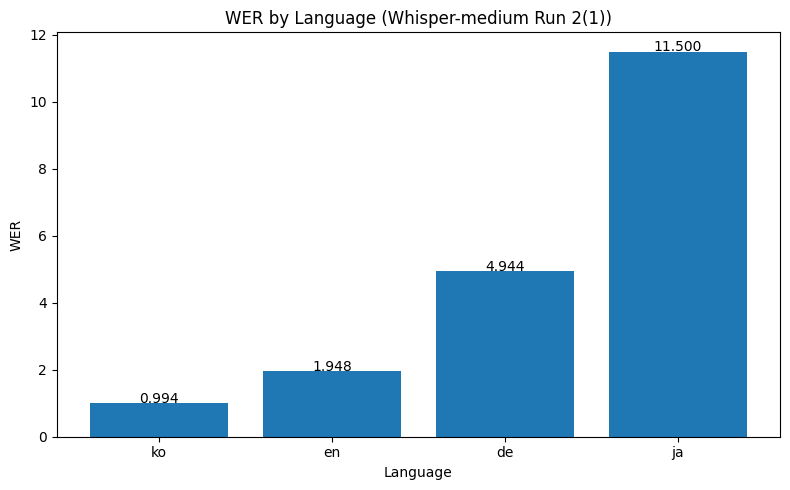

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print("\n📊 WER 결과 (낮을수록 정확)")
for lang, score in sorted(lang_wer_results.items(), key=lambda x: x[1]):
    print(f"{lang.upper()} : {score:.4f}")

langs_sorted = [x[0] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]
scores_sorted = [x[1] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]

plt.figure(figsize=(8,5))
plt.bar(langs_sorted, scores_sorted)
plt.title("WER by Language (Whisper-medium Run 2(1))")
plt.xlabel("Language")
plt.ylabel("WER")

for i, v in enumerate(scores_sorted):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.savefig("wer_medium_run2(1).png")
plt.show()

📊 WER 결과 (낮을수록 정확)
- DE : 0.5984 -> 0.5269 (좋아짐) -> 4.9438 (나빠짐)
- KO : 0.6093 -> 0.5352 (좋아짐) -> 0.9937 (나빠짐)
- EN : 0.9600 -> 1.5449 (나빠짐) -> 1.9482 (나빠짐)
- JA : 4.7100 -> 0.9900 (좋아짐) -> 11.5000 (나빠짐)

=> medium model은 하이퍼 파라미터 튜닝 안하고 데이터만 100개 증량했을 때 4가지 언어 중 3가지 언어에서 성능이 조금이라도 나아진 걸 볼 수 있음